<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/ProfCientistaDados_m36_supportmaterial_exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa

Carregue a base ```NFP.ftr```. Essa base √© proveniente do projeto #AMABiliDados, e cont√©m dados da nota fiscal paulista cadastrados para doa√ß√£o autom√°tica para a AMA, Associa√ß√£o de Amigos do Autista.

A *Nota Fiscal Paulista* √© um programa de incentivo do governo do estado de S√£o Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus cr√©ditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os cr√©ditos de notas emitidas pelo mesmo estabelecimento n√£o identificadas (notas sem CPF) s√£o "arrastados" para a ONG na forma de uma doa√ß√£o.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidad√£o pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus cr√©ditos √† AMA. Seus campos est√£o descritos abaixo:

|Campo|Descri√ß√£o|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| N√∫mero da nota fiscal|
|Data Emiss√£o| Data de emiss√£o da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Cr√©ditos| Valor dos cr√©ditos (doa√ß√£o)|
|Situa√ß√£o do Cr√©dito| Se o cr√©dito j√° foi pago, est√° sendo processado etc.|
|Ano| Ano da emiss√£o da nota|
|Semestre| Semestre da emiss√£o da nota|
|Retorno| Valor do cr√©dito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui cr√©dito positivo|
|categoria| Categoriza√ß√£o da nota |

**OBJETIVO:** Algumas notas n√£o d√£o retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorr√™ncia de produtos n√£o incentivados como cigarros e bebidas alc√≥licas. O nosso objetivo √© tentar prever que tipo de nota tem maior ou menor propens√£o a fornecer cr√©ditos.

**Observa√ß√£o**: Esta √© uma base real, havendo caracter√≠sticas de acordo. Pode haver uma variabilidade dif√≠cil de explicar, em parte por causa de uma freq√º√™ncia de notas inconstante no tempo (por diversos motivos), em parte por haverem informa√ß√µes importantes, protegidas pela LGPD, n√£o constantes na base, que pode interferir no cr√©dito gerado, o que vai ocasionar uma variabilidade dif√≠cil de se explicar. *Welcome to the jungle*, A vida real √© assim :)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_pickle('/content/drive/MyDrive/EspecializacÃßaÃÉo em IA/Cientista de Dados - Ebac/Modelagem de Dados Categorizados/Descritiva IV - VisualizacÃßaÃÉo de dados categorizados/base_nfp.pkl')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emiss√£o  Valor NF Data Registro  Cr√©ditos Situa√ß√£o do Cr√©dito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         1  0.000000             0       Mercado  
1  2017         1  0.000000             0    Auto posto  
2  2017         1  0.016296             1  Restaurantes  
3  2017         1  0.016233             1  Restaurantes  
4  2017         1  0.016240             1  Restaurantes

## An√°lise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta an√°lise.

- Analise a propor√ß√£o de notas que tiveram retorno>0 por categoria de estabelecimento. Esta an√°lise pode ser por tabela ou gr√°fico.

In [97]:
df_jan = df[df['Data Emiss√£o'] >= '2020-01-01']
tab_p = pd.crosstab(df_jan.categoria, df_jan.flag_credito, margins=True, margins_name='total')
tab_p

flag_credito      0      1  total
categoria                        
Alimentos      1608   3442   5050
Auto posto      405    135    540
Constru√ß√£o     8524   7523  16047
Farm√°cia       6607   3582  10189
Mercado       14381  13177  27558
Restaurantes    553   1626   2179
Varejo         4365    701   5066
Vestu√°rio      1477    443   1920
n√£o definido  11718   6689  18407
total         49638  37318  86956

In [98]:
r√≥tulo_nao_retorno = tab_p.columns[0]
r√≥tulo_retorno = tab_p.columns[1]
tab_p['pct_retorno'] = tab_p[r√≥tulo_retorno] / tab_p['total']
tab_p

flag_credito      0      1  total  pct_retorno
categoria                                     
Alimentos      1608   3442   5050     0.681584
Auto posto      405    135    540     0.250000
Constru√ß√£o     8524   7523  16047     0.468810
Farm√°cia       6607   3582  10189     0.351556
Mercado       14381  13177  27558     0.478155
Restaurantes    553   1626   2179     0.746214
Varejo         4365    701   5066     0.138373
Vestu√°rio      1477    443   1920     0.230729
n√£o definido  11718   6689  18407     0.363394
total         49638  37318  86956     0.429160

<Axes: xlabel='categoria'>

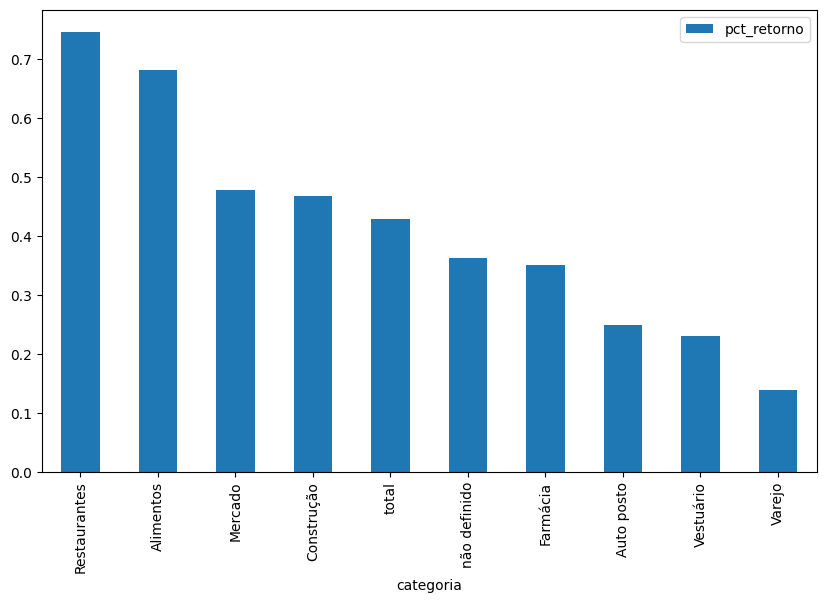

In [92]:
tab_p_sorted = tab_p.sort_values('pct_retorno', ascending=False)
tab_p_sorted.plot(kind='bar', stacked=True, y='pct_retorno', figsize=(10, 6))

## C√°lculo do WOE

- Calcule o WOE das categorias, sendo que o evento em quest√£o √© a nota ter retorno>0.
- Analise este WOE por tabela e por gr√°fico.

In [99]:
tab['pct_evento'] = tab[r√≥tulo_retorno] / tab.loc['total',r√≥tulo_retorno]
tab['pct_nao_evento'] = tab[r√≥tulo_nao_retorno] / tab.loc['total',r√≥tulo_nao_retorno]
tab['woe'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])

tab[['pct_evento', 'pct_nao_evento', 'woe']]

flag_credito  pct_evento  pct_nao_evento       woe
categoria                                         
Restaurantes    0.043571        0.011141  1.363801
Alimentos       0.092234        0.032395  1.046342
Mercado         0.353100        0.289718  0.197846
Constru√ß√£o      0.201592        0.171723  0.160360
total           1.000000        1.000000  0.000000
n√£o definido    0.179243        0.236069 -0.275381
Farm√°cia        0.095986        0.133104 -0.326928
Auto posto      0.003618        0.008159 -0.813331
Vestu√°rio       0.011871        0.029755 -0.918918
Varejo          0.018785        0.087937 -1.543585

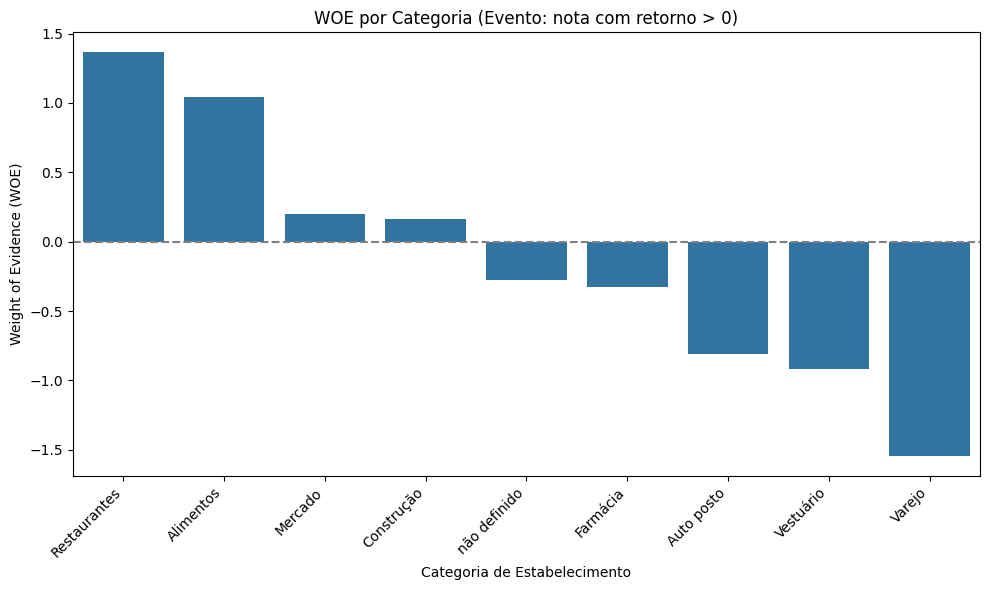

In [100]:
# grafico
tab_woe = tab.drop("total").reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=tab_woe, x="categoria", y="woe")
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Weight of Evidence (WOE)")
plt.xlabel("Categoria de Estabelecimento")
plt.title("WOE por Categoria (Evento: nota com retorno > 0)")
plt.tight_layout()
plt.show()

## C√°lculo do *Information Value*

Calcule o *IV* dessa vari√°vel.

In [101]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
print(tab.iv_parcial.sum())
tab

0.27882574285237305


flag_credito      0      1  total  pct_retorno  pct_evento  pct_nao_evento  \
categoria                                                                    
Restaurantes    553   1626   2179     0.746214    0.043571        0.011141   
Alimentos      1608   3442   5050     0.681584    0.092234        0.032395   
Mercado       14381  13177  27558     0.478155    0.353100        0.289718   
Constru√ß√£o     8524   7523  16047     0.468810    0.201592        0.171723   
total         49638  37318  86956     0.429160    1.000000        1.000000   
n√£o definido  11718   6689  18407     0.363394    0.179243        0.236069   
Farm√°cia       6607   3582  10189     0.351556    0.095986        0.133104   
Auto posto      405    135    540     0.250000    0.003618        0.008159   
Vestu√°rio      1477    443   1920     0.230729    0.011871        0.029755   
Varejo         4365    701   5066     0.138373    0.018785        0.087937   

flag_credito       woe  iv_parcial  
categoria                           
Restaurantes  1.363801    0.044229  
Alimentos     1.046342    0.062613  
Mercado       0.197846    0.012540  
Constru√ß√£o    0.160360    0.004790  
total         0.000000    0.000000  
n√£o definido -0.275381    0.015649  
Farm√°cia     -0.326928    0.012135  
Auto posto   -0.813331    0.003694  
Vestu√°rio    -0.918918    0.016434  
Varejo       -1.543585    0.106742

## Conclua

N√£o se esque√ßa de registrar suas conclus√µes em uma c√©lula de texto. <font color='red'>**Sugest√£o:**</font> tente alterar a cor da fonte nesta c√©lula para diferenci√°-la das demais.


### üîç Conclus√µes da An√°lise do WOE e IV (Evento: Nota com Retorno > 0)

- A vari√°vel **‚Äúcategoria‚Äù** mostra-se relevante para diferenciar notas com ou sem retorno, com um **IV total de aproximadamente 0.279** ‚Äî o que indica **poder preditivo m√©dio**.

- As categorias com **maior propens√£o** a gerar retorno s√£o:
  - **Restaurantes** (WOE = 1.36 | IV parcial = 0.044)
  - **Alimentos** (WOE = 1.05 | IV parcial = 0.066)
  - Ambas s√£o fortemente associadas a um comportamento positivo de retorno.

- As categorias com **menor propens√£o** (mais negativas) s√£o:
  - **Varejo** (WOE = -1.54 | IV parcial = 0.107)
  - **Vestu√°rio** (WOE = -0.91 | IV parcial = 0.016)
  - **Auto Posto** e **Farm√°cia** tamb√©m aparecem com WOE negativo.

- **Mercado** e **Constru√ß√£o** apresentam WOE levemente positivo, indicando que sua propens√£o ao retorno √© pr√≥xima da m√©dia, com contribui√ß√£o moderada ao IV.

- A categoria **‚Äún√£o definido‚Äù** possui comportamento amb√≠guo (WOE negativo e IV parcial relevante), refor√ßando a import√¢ncia de melhorar a classifica√ß√£o dos dados.

---

**Recomenda√ß√µes:**
- Em modelos preditivos, a vari√°vel ‚Äúcategoria‚Äù deve ser considerada, especialmente com encoding por WOE.
- Pol√≠ticas de incentivo podem ser mais eficazes se priorizarem **Restaurantes** e **Alimentos**, e repensadas para segmentos como **Varejo** e **Vestu√°rio**.
